In [31]:
%load_ext autoreload
%autoreload 2

import os, subprocess, urllib, tempfile, importlib

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import cortex as cx

from nilearn.surface import load_surf_data
from scipy.io import loadmat
from scipy.ndimage import gaussian_filter

import popylar

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Download data for demonstration

In [37]:
#
# download a pycortex subject (flatmap, etc) 
# of the 1.6 mm HCP standard surfaces from figshare
#

if not os.path.exists(os.path.join(cx.database.default_filestore, 'hcp_999999')):
    pycortex_sj_URL = "https://ndownloader.figshare.com/files/25768841"

    tempfolder = tempfile.gettempdir()
    urllib.request.urlretrieve(pycortex_sj_URL, os.path.join(tempfolder, 'hcp_999999.zip'))
    subprocess.run(['unzip', '-q', '-n', 
                    os.path.join(tempfolder, "hcp_999999.zip"), 
                    '-d', cx.database.default_filestore])

#
# and then download several projects' data from figshare
# and extract the prf experiment data
#
with importlib.resources.files(popylar) as package:
    prf_data_folder = package / 'data' / 'demo'  / 'prf_mapper_59k'
    atlas_folder = package / 'data' / 'demo' / 'atlas'
    if not os.path.exists(prf_data_folder):
        timeseries_data_URL = 'https://ndownloader.figshare.com/articles/14096209/versions/3'
        urllib.request.urlretrieve(timeseries_data_URL, os.path.join(tempfolder, '14096209.zip'))
        subprocess.run(['unzip', '-qq', '-n', 
                        os.path.join(tempfolder, '14096209.zip'), '-d', tempfolder])
        subprocess.run(['unzip', '-qq', '-n', 
                        os.path.join(tempfolder, 'prf_mapper_59k.zip'), '-d', 
                        prf_data_folder])                
        subprocess.run(['unzip', '-qq', '-n', 
                        os.path.join(tempfolder, 'atlas.zip'), '-d', 
                        os.path.split(atlas_folder)[0]])           


### Load data 

In [46]:
tseries_raw = np.nan_to_num(np.concatenate([load_surf_data(os.path.join(prf_data_folder, 
                                                f'sub-02_task-prf_space-59k_hemi-{hemi}_run-median_desc-bold.func.gii'))
                                for hemi in ['L', 'R']]))
atlas_data = np.concatenate([load_surf_data(
        os.path.join(atlas_folder, f'Q1-Q6_RelatedParcellation210.CorticalAreas_dil_Colors.59k_fs_LR.dlabel.{hemi}.gii'))
         for hemi in ['L', 'R']])
atlas_data_both_hemis = np.mod(atlas_data, 180)
design_matrix = loadmat(os.path.join(prf_data_folder, 'vis_design.mat'))['stim'].T
sm_design_matrix = np.array([gaussian_filter(dmt, 10).T for dmt in design_matrix])

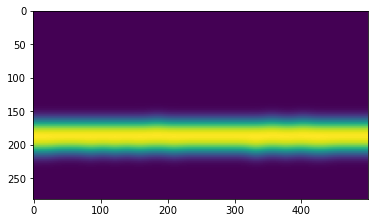

In [47]:
plt.imshow(sm_design_matrix[24])